<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/modeling/model_backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torch.optim as optim
from google.colab import drive
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [ ]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2021/12/30,0,0,0,0,0,NaN
1,2021/12/29,0,0,0,0,0,NaN
2,2021/12/28,0,0,0,0,0,NaN
3,2021/12/27,0,0,0,0,0,NaN
4,2021/12/24,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
5525,1999/08/17,0,0,1,0,0,NaN
5526,1999/08/16,0,0,1,1,0,NaN
5527,1999/08/13,0,0,1,1,0,NaN
5528,1999/08/12,0,0,1,1,0,NaN


In [ ]:
data[data['MAP_sig'] == -1]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
234,2021/01/21,0,0,-1,-1,0,0.183673
267,2020/12/02,0,0,1,-1,0,-0.555556
268,2020/12/01,0,0,1,-1,0,-0.777778
269,2020/11/30,0,0,1,-1,0,-1.000000
430,2020/04/06,0,0,1,-1,0,-0.100000
431,2020/04/03,0,0,1,-1,0,-0.250000
439,2020/03/24,0,-1,1,-1,0,-0.750000
440,2020/03/23,0,-1,1,-1,-1,-0.800000
442,2020/03/19,0,-1,1,-1,0,-1.000000
1380,2016/05/24,0,0,-1,-1,0,0.250000


In [ ]:
data['TREND'].isnull().sum()

24

In [ ]:
data['TREND'] = data['TREND'].fillna(0)

In [ ]:
data.isnull().sum()

TRD_DD     0
GDC_sig    0
RSI_sig    0
ROC_sig    0
MAP_sig    0
STC_sig    0
TREND      0
dtype: int64

In [ ]:
data[0.1 < data['TREND']]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
17,2021/12/07,0,0,0,0,0,1.000000
18,2021/12/06,0,0,0,0,0,0.714286
58,2021/10/08,0,0,0,0,0,0.164835
59,2021/10/07,0,0,0,0,0,0.186813
60,2021/10/06,0,0,0,0,0,0.208791
...,...,...,...,...,...,...,...
5508,1999/09/09,0,0,-1,0,0,0.555556
5509,1999/09/08,0,0,-1,0,0,0.444444
5510,1999/09/07,0,0,-1,0,0,0.333333
5511,1999/09/06,0,0,-1,0,0,0.222222


In [ ]:
#최신 데이터가 뒤로 오도록 정렬
data = data.sort_values(by=['TRD_DD'])
data.set_index('TRD_DD',drop=True,inplace=True)
data.reset_index('TRD_DD',drop=False,inplace=True)
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [ ]:
# data.set_index('TRD_DD', drop=True, inplace=True)
# data

In [ ]:
Y_colname = ['TREND'] #종속변수
X_remove = ['TRD_DD']
X_colname = [x for x in data.columns if x not in Y_colname + X_remove] #입력변수들
X_colname

['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig']

In [ ]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[0 : round(len(df) * 0.75)] 
  df_test = df.loc[round(len(df) * 0.75) + 1 : ]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return df_train, df_test, X_train, X_test, Y_train, Y_test

In [ ]:
df_train, df_test, X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)

In [ ]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) 
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4149, 5) Y_train : (4149, 1)
X_test : (1381, 5) Y_test : (1381, 1)


In [ ]:
#array로 변환
X_train_arr = X_train.values
Y_train_arr = Y_train.values
X_test_arr = X_test.values
Y_test_arr = Y_test.values

In [ ]:
seq_length = 12 #몇개의 입력데이터로 차분 데이터 생성할지에 대한 파라미터. 지금은 12라고 가정. 나중에 반복문을 통해 sequence 최적화가 필요할듯.
X_train, Y_train = [], []
for index in range(len(X_train_arr) - seq_length): #sequence개의 데이터만큼 차분데이터 분석에 사용하므로, 총 데이터 개수 - sequence개수가 전체 데이터의 길이 --> 총길이만큼 돌리는 것이므로, 기존 차원을 뜻하는 (row, column) 꼴에는 변함 없음 --> 2차원 데이터
  X_train.append(np.array(X_train_arr[index:index + seq_length])) #X_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> sequence를 뜻하는 차원 생성
  Y_train.append(np.ravel(Y_train_arr[index + seq_length:index + seq_length + 1])) #Y_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> 그러나 ravel() 로 차원축소 --> sequence차원 생성되지 않음.
X_train, Y_train = np.array(X_train), np.array(Y_train) #array로 저장되어있는 리스트를 array로 변환해서 저장

In [ ]:
X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
for index in range(len(X_test_arr) - seq_length):
  X_test.append(np.array(X_test_arr[index:index + seq_length])) 
  Y_test.append(np.ravel(Y_test_arr[index + seq_length:index + seq_length + 1]))
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [ ]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) #X/Y 분리가 잘 됨. 데이터 전처리 과정 완료
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4137, 12, 5) Y_train : (4137, 1)
X_test : (1369, 12, 5) Y_test : (1369, 1)


In [ ]:
#텐서로 변환 : 파이토치 모델은 float32타입으로만 돌아감.
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [ ]:
X_train.shape

torch.Size([4137, 12, 5])

In [ ]:
X_train.dtype

torch.float32

In [ ]:
Y_test

tensor([[-0.1429],
        [-0.5714],
        [-0.7143],
        ...,
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

# 모델링

In [ ]:
# Model Class 생성

class SignalPredictor(nn.Module):
    
    def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
        super(SignalPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers

        self.lstm = nn.LSTM(
        input_size = n_features,
        hidden_size = n_hidden,
        num_layers = n_layers,
        )
        
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
        
    def reset_hidden_state(self):
            self.hidden = (
                torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
                torch.zeros(self.n_layers, self.seq_len, self.n_hidden))
            
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(sequences.view(len(sequences), self.seq_len, -1), self.hidden)
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
    
        return y_pred

In [ ]:
def train_model(model, train_data, train_labels, test_data=None, test_labels=None, num_epochs=250, lr=1e-3):
    loss_fn = torch.nn.MSELoss()
    
    optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    num_epochs = num_epochs
    
    train_hist = np.zeros(num_epochs)
    test_hist = np.zeros(num_epochs)
    
    for t in range(num_epochs):
        model.reset_hidden_state()
        y_pred = model(X_train)
        loss = loss_fn(y_pred.float(), Y_train)
        
        if test_data is not None:
            with torch.no_grad():
                y_test_pred = model(X_test)
                test_loss = loss_fn(y_test_pred.float(), Y_test)
            test_hist[t] = test_loss.item()
            
            if t % 10 == 0:
                print(f'Epoch {t} train loss: {round(loss.item(),4)} test loss: {round(test_loss.item(),4)}')
        elif t % 10 == 0:
            print(f'Epoch {t} train loss: {loss.item()}')
            
        train_hist[t] = loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    return model.eval(), train_hist, test_hist

In [ ]:
# Hyper-parameter 설정
n_features=X_train.shape[-1]
n_hidden=64
n_layers=4
lr=1e-4
num_epochs=100

In [ ]:
# Training Model
model = SignalPredictor(n_features=n_features, n_hidden=n_hidden, seq_len=seq_length, n_layers=n_layers)
model, train_hist, test_hist = train_model(model, X_train, Y_train, X_test, Y_test, num_epochs=num_epochs, lr=lr)

Epoch 0 train loss: 0.3543 test loss: 0.3459
Epoch 10 train loss: 0.3511 test loss: 0.3427
Epoch 20 train loss: 0.3494 test loss: 0.341
Epoch 30 train loss: 0.3489 test loss: 0.3405
Epoch 40 train loss: 0.3488 test loss: 0.3405
Epoch 50 train loss: 0.3488 test loss: 0.3405
Epoch 60 train loss: 0.3488 test loss: 0.3405
Epoch 70 train loss: 0.3488 test loss: 0.3405
Epoch 80 train loss: 0.3488 test loss: 0.3405
Epoch 90 train loss: 0.3488 test loss: 0.3405


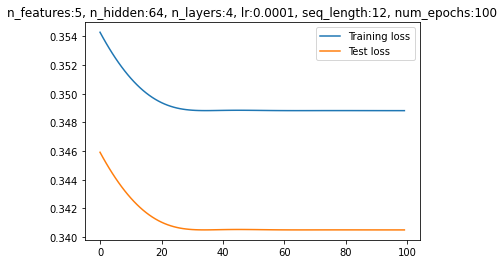

In [ ]:
# plotting Loss
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.title('n_features:{0}, n_hidden:{1}, n_layers:{2}, lr:{3}, seq_length:{4}, num_epochs:{5}'.format(n_features,n_hidden,n_layers,lr,seq_length,num_epochs))
plt.legend()

# 예측

In [ ]:
with torch.no_grad():
    
    preds = []
    for i in range(len(X_test)):
        test_seq = X_test[i:i+1]
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, pred)
        new_seq = new_seq[1:]
        test_seq = torch.as_tensor(new_seq).view(n_features, seq_length, 1).float()

In [ ]:
preds

[-0.0009558945894241333,
 -0.0009776987135410309,
 -0.0010030865669250488,
 -0.0010340772569179535,
 -0.0010702461004257202,
 -0.0011097714304924011,
 -0.0011502280831336975,
 -0.0011892542243003845,
 -0.0012250244617462158,
 -0.0012563839554786682,
 -0.0012828372418880463,
 -0.001304425299167633,
 -0.0013215690851211548,
 -0.0013348273932933807,
 -0.0013448670506477356,
 -0.0013523325324058533,
 -0.0013577863574028015,
 -0.0013617128133773804,
 -0.0013645067811012268,
 -0.0013664774596691132,
 -0.0013678483664989471,
 -0.0013687796890735626,
 -0.0013694316148757935,
 -0.0013698674738407135,
 -0.001370161771774292,
 -0.0013703703880310059,
 -0.001370500773191452,
 -0.0013705864548683167,
 -0.001370646059513092,
 -0.0013706907629966736,
 -0.0013707131147384644,
 -0.0013707317411899567,
 -0.0013707354664802551,
 -0.00136629119515419,
 -0.001359742134809494,
 -0.0013508759438991547,
 -0.0013422667980194092,
 -0.001336410641670227,
 -0.0013388842344284058,
 -0.001350637525320053,
 -0.00136

In [ ]:
Y_test_array = np.array(Y_test).reshape(-1,1)
real = list(Y_test_array.flatten())
real

[-0.14285715,
 -0.5714286,
 -0.71428573,
 -0.85714287,
 -1.0,
 -0.9259259,
 -0.7037037,
 -0.6296296,
 -0.5555556,
 -0.4814815,
 -0.4074074,
 -0.18518518,
 -0.11111111,
 -0.037037037,
 0.037037037,
 0.11111111,
 0.33333334,
 0.4074074,
 0.4814815,
 0.5555556,
 0.6296296,
 0.8518519,
 0.9259259,
 1.0,
 0.875,
 0.75,
 0.375,
 0.25,
 0.125,
 0.0,
 -0.125,
 -0.5,
 -0.625,
 -0.75,
 -0.875,
 -1.0,
 0.2,
 0.6,
 1.0,
 0.95,
 0.9,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.35,
 0.3,
 0.25,
 0.2,
 0.05,
 1.110223e-16,
 -0.05,
 -0.1,
 -0.15,
 -0.3,
 -0.35,
 -0.4,
 -0.45,
 -0.5,
 -0.65,
 -0.7,
 -0.75,
 -0.8,
 -0.85,
 -1.0,
 -0.9692308,
 -0.7846154,
 -0.75384617,
 -0.72307694,
 -0.6923077,
 -0.6615385,
 -0.5692308,
 -0.53846157,
 -0.50769234,
 -0.47692308,
 -0.44615385,
 -0.32307693,
 -0.2923077,
 -0.26153848,
 -0.23076923,
 -0.13846155,
 -0.10769231,
 -0.07692308,
 -0.046153847,
 -0.015384615,
 0.07692308,
 0.10769231,
 0.13846155,
 0.16923077,
 0.2,
 0.2923077,
 0.32307693,
 0.35384616,
 0.3846154,
 0.41

In [ ]:
# 실제값 예측값 데이터 프레임 생성
score_table = pd.DataFrame({'TREND':real,
                            'Pred':preds})
score_table

,TREND,Pred
0,-0.142857,-0.000956
1,-0.571429,-0.000978
2,-0.714286,-0.001003
3,-0.857143,-0.001034
4,-1.000000,-0.001070
...,...,...
1364,0.000000,-0.000960
1365,0.000000,-0.000960
1366,0.000000,-0.000960
1367,0.000000,-0.000960


In [ ]:
score_table[score_table['Pred'] > 0]

,TREND,Pred


딱봐도 예측 굉장히 못한다는 것을 알 수 있음 -> lstm의 많은 파라미터들을 조율/최적화 해봐야 할듯.

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(score_table['TREND'], score_table['Pred'])
RMSE = np.sqrt(MSE)
score = 100*(1-(((score_table['Pred'] -score_table['TREND'])**2).sum())/((score_table['TREND']**2).sum()))

In [ ]:
print("MSE : {0}, RMSE : {1}, SCORE : {2}".format(MSE, RMSE, score))

MSE : 0.3405430007554584, RMSE : 0.5835606230336814, SCORE : -0.010968268892597166


진짜 굉장히 안좋네요.......ㅠㅠ

# backtest 실행

In [ ]:
!pip install backtrader

     |████████████████████████████████| 410 kB 5.4 MB/s 


In [ ]:
!pip install backtesting

     |████████████████████████████████| 175 kB 5.3 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173823 sha256=0485e98dfb5e726c0ba00d914e176248ea5f246d29ec5e83b4c0ce10b2edee40
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


In [ ]:
import pandas as pd
import backtrader as bt
from backtrader.feeds import PandasData
import backtrader.indicators as btind

In [ ]:
import json
with open('/content/drive/MyDrive/[Shared]K-Project/data/initial_data1.json',"r") as json_file:
    json_data = json.load(json_file) 

In [ ]:
df = pd.read_json(json_data['KR7006840003'], orient ='index') # 첫번째 키값으로 데이터프레임 변환
json_df = df.transpose()
json_df = json_df[['TRD_DD', 'TDD_OPNPRC', 'TDD_HGPRC', 'TDD_LWPRC', 'TDD_CLSPRC', 'ACC_TRDVOL']]
json_df = json_df.sort_values(by=['TRD_DD'])
json_df.reset_index(drop=True,inplace=True)
json_df

# backtest를 하기 위해서는 다음과 같은 데이터의 형식이 필요합니다.
# 날짜별 데이터를 불러와서 다음과 같이 가공해줍니다.

,TRD_DD,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,TDD_CLSPRC,ACC_TRDVOL
0,1999/08/11,"32,500","37,000","32,500","32,500","444,090"
1,1999/08/12,"32,400","32,500","27,650","27,650","271,400"
2,1999/08/13,"27,400","29,100","24,600","27,000","237,290"
3,1999/08/16,"25,500","27,950","25,500","25,500","88,610"
4,1999/08/17,"25,600","26,200","22,500","22,500","74,700"
...,...,...,...,...,...,...
5525,2021/12/24,"20,000","20,200","19,750","19,800","42,327"
5526,2021/12/27,"19,950","19,950","19,600","19,750","15,123"
5527,2021/12/28,"20,000","20,000","19,250","19,350","52,509"
5528,2021/12/29,"19,350","19,600","19,200","19,400","27,699"


In [ ]:
df_idx = json_df.index[json_df['TRD_DD'] == '2016/06/10'][0]
raw = json_df.iloc[df_idx:]
raw.reset_index(drop = True, inplace = True)
raw['TRD_DD'] = pd.to_datetime(raw['TRD_DD'])
raw
# test 길이만큼 전종목 데이터를 잘라냅니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TRD_DD,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,TDD_CLSPRC,ACC_TRDVOL
0,2016-06-10,"67,000","68,400","66,200","68,200","47,380"
1,2016-06-13,"67,200","67,700","65,800","66,300","43,985"
2,2016-06-14,"65,700","66,200","64,000","65,500","48,190"
3,2016-06-15,"65,500","65,800","64,000","64,600","19,472"
4,2016-06-16,"64,600","65,900","64,000","64,500","38,065"
...,...,...,...,...,...,...
1364,2021-12-24,"20,000","20,200","19,750","19,800","42,327"
1365,2021-12-27,"19,950","19,950","19,600","19,750","15,123"
1366,2021-12-28,"20,000","20,000","19,250","19,350","52,509"
1367,2021-12-29,"19,350","19,600","19,200","19,400","27,699"


In [ ]:
test_data = df_test.iloc[12:] # seq_length 가 12이기 때문에 앞에 12개 데이터 삭제
test_data.reset_index(drop = True, inplace = True)
test_data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2016/06/10,0,0,-1,0,0,-0.142857
1,2016/06/13,0,0,-1,0,0,-0.571429
2,2016/06/14,0,0,-1,0,0,-0.714286
3,2016/06/15,0,0,-1,0,0,-0.857143
4,2016/06/16,0,0,-1,0,0,-1.000000
...,...,...,...,...,...,...,...
1364,2021/12/24,0,0,0,0,0,0.000000
1365,2021/12/27,0,0,0,0,0,0.000000
1366,2021/12/28,0,0,0,0,0,0.000000
1367,2021/12/29,0,0,0,0,0,0.000000


In [ ]:
pred_data = pd.merge(test_data, score_table, left_index = True, right_index = True).drop(columns='TREND_y')
pred_data = pred_data.rename(columns={'TREND_x': 'TREND'})
pred_data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND,Pred
0,2016/06/10,0,0,-1,0,0,-0.142857,-0.000956
1,2016/06/13,0,0,-1,0,0,-0.571429,-0.000978
2,2016/06/14,0,0,-1,0,0,-0.714286,-0.001003
3,2016/06/15,0,0,-1,0,0,-0.857143,-0.001034
4,2016/06/16,0,0,-1,0,0,-1.000000,-0.001070
...,...,...,...,...,...,...,...,...
1364,2021/12/24,0,0,0,0,0,0.000000,-0.000960
1365,2021/12/27,0,0,0,0,0,0.000000,-0.000960
1366,2021/12/28,0,0,0,0,0,0.000000,-0.000960
1367,2021/12/29,0,0,0,0,0,0.000000,-0.000960


In [ ]:
pred_bt = pred_data[['TRD_DD', 'Pred']]
pred_bt['TRD_DD'] = pd.to_datetime(pred_bt['TRD_DD'])
pred_bt
# 날짜와 예측값만 남은 데이터프레임 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TRD_DD,Pred
0,2016-06-10,-0.000956
1,2016-06-13,-0.000978
2,2016-06-14,-0.001003
3,2016-06-15,-0.001034
4,2016-06-16,-0.001070
...,...,...
1364,2021-12-24,-0.000960
1365,2021-12-27,-0.000960
1366,2021-12-28,-0.000960
1367,2021-12-29,-0.000960


In [ ]:
pred_bt[pred_bt['Pred'] < -0.3]

,TRD_DD,Pred


In [ ]:
pred_bt.loc[pred_bt['Pred'] < -0.8, 'Pred'] = -1
pred_bt.loc[pred_bt['Pred'] > 0.8, 'Pred'] = 1
pred_bt.loc[pred_bt['Pred'] != (-1 or 1) , 'Pred'] = 0
pred_bt

# -0.8보다 작으면 매수, 0.8보다 크면 매도

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,TRD_DD,Pred
0,2016-06-10,0.0
1,2016-06-13,0.0
2,2016-06-14,0.0
3,2016-06-15,0.0
4,2016-06-16,0.0
...,...,...
1364,2021-12-24,0.0
1365,2021-12-27,0.0
1366,2021-12-28,0.0
1367,2021-12-29,0.0


In [ ]:
final = pd.merge(raw, pred_bt, left_index = True, right_index = True).drop(columns='TRD_DD_y')
final = final.rename(columns={'TRD_DD_x': 'TRD_DD'})
final['TDD_OPNPRC'] = final['TDD_OPNPRC'].str.replace(',','').astype('float')
final['TDD_HGPRC'] = final['TDD_HGPRC'].str.replace(',','').astype('float')
final['TDD_LWPRC'] = final['TDD_LWPRC'].str.replace(',','').astype('float')
final['TDD_CLSPRC'] = final['TDD_CLSPRC'].str.replace(',','').astype('float')
final['ACC_TRDVOL'] = final['ACC_TRDVOL'].str.replace(',','').astype('float')
final = final.astype({'Pred':'int'})
final
# 날짜별 데이터와 예측값 병합

,TRD_DD,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,TDD_CLSPRC,ACC_TRDVOL,Pred
0,2016-06-10,67000.0,68400.0,66200.0,68200.0,47380.0,0
1,2016-06-13,67200.0,67700.0,65800.0,66300.0,43985.0,0
2,2016-06-14,65700.0,66200.0,64000.0,65500.0,48190.0,0
3,2016-06-15,65500.0,65800.0,64000.0,64600.0,19472.0,0
4,2016-06-16,64600.0,65900.0,64000.0,64500.0,38065.0,0
...,...,...,...,...,...,...,...
1364,2021-12-24,20000.0,20200.0,19750.0,19800.0,42327.0,0
1365,2021-12-27,19950.0,19950.0,19600.0,19750.0,15123.0,0
1366,2021-12-28,20000.0,20000.0,19250.0,19350.0,52509.0,0
1367,2021-12-29,19350.0,19600.0,19200.0,19400.0,27699.0,0


backtest 실행

In [ ]:
class PandasData_Signal(PandasData):

  lines = ('signal',)

  # add the parameter to the parameters inherited from the base class

  params = (('signal', 6),)

In [ ]:
class MLSignal(bt.SignalStrategy):

    def log(self, txt, dt=None):

        ''' Logging function fot this strategy'''

        dt = dt or self.datas[0].datetime.date(0)

        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.signal = self.datas[0].signal
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                    order.executed.value,
                    order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                (trade.pnl, trade.pnlcomm))
        
    def next(self):
        #Check if we are in the market 
        if not self.position :            
            if self.signal[0] == -1:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                #Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
                
        else:           
            #Already in the market...we might sell                     
            if self.signal[0] == 1:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

In [ ]:
# 세레브로 (벡트레이더 엔진) 설정

# 세레브로 가져오기
cerebro = bt.Cerebro()

# 데이터 가져오기
data = PandasData_Signal(dataname = final,
                datetime = 0,
                open = 1,
                high = 2,
                low = 3,
                close = 4,
                volume = 5,
                openinterest = -1,
                signal = 6,
                )

# 데이터 추가하기
cerebro.adddata(data)

# 전략 추가하기
cerebro.addstrategy(MLSignal)

# 브로커 설정
cerebro.broker.setcash(1000000)

# 매매 단위 설정
cerebro.addsizer(bt.sizers.SizerFix, stake = 30) #한번에 30주 설정.

In [ ]:
# 3. 세레브로 실행하기

# 초기 투자금 가져오기
init_cash = cerebro.broker.getvalue()

# 세레브로 실행하기
cerebro.run()

# 최종 금액 가져오기
final_cash = cerebro.broker.getvalue()

print('init_cash: ', init_cash)
print('final_cash: ', final_cash)

print("최종금액 : ", final_cash, "원")
print("수익률 : ", float(final_cash - init_cash)/float(init_cash) * 100., "%")
print("\n")

init_cash:  1000000
final_cash:  1000000.0
최종금액 :  1000000.0 원
수익률 :  0.0 %


